In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_f=pd.read_csv('Datasets/train.csv')

In [3]:
train_f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_f.shape

(891, 12)

In [5]:
train_f.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_f.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_f.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [9]:
train_f.drop('Name',axis=1,inplace=True)
train_f.drop('Ticket',axis=1,inplace=True)
train_f.drop('Cabin',axis=1,inplace=True)
train_f.drop('PassengerId',axis=1,inplace=True)

In [10]:
train_f.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
train_f.shape


(891, 8)

In [12]:
train_f=pd.get_dummies(train_f,drop_first=True)

In [13]:
train_f.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
train_f.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [15]:
train_f['Age'].fillna(train_f['Age'].mean(),inplace=True)

In [16]:
train_f.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

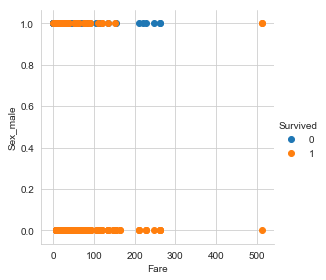

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(train_f,hue='Survived',height=4).map(plt.scatter,'Fare','Sex_male').add_legend()
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


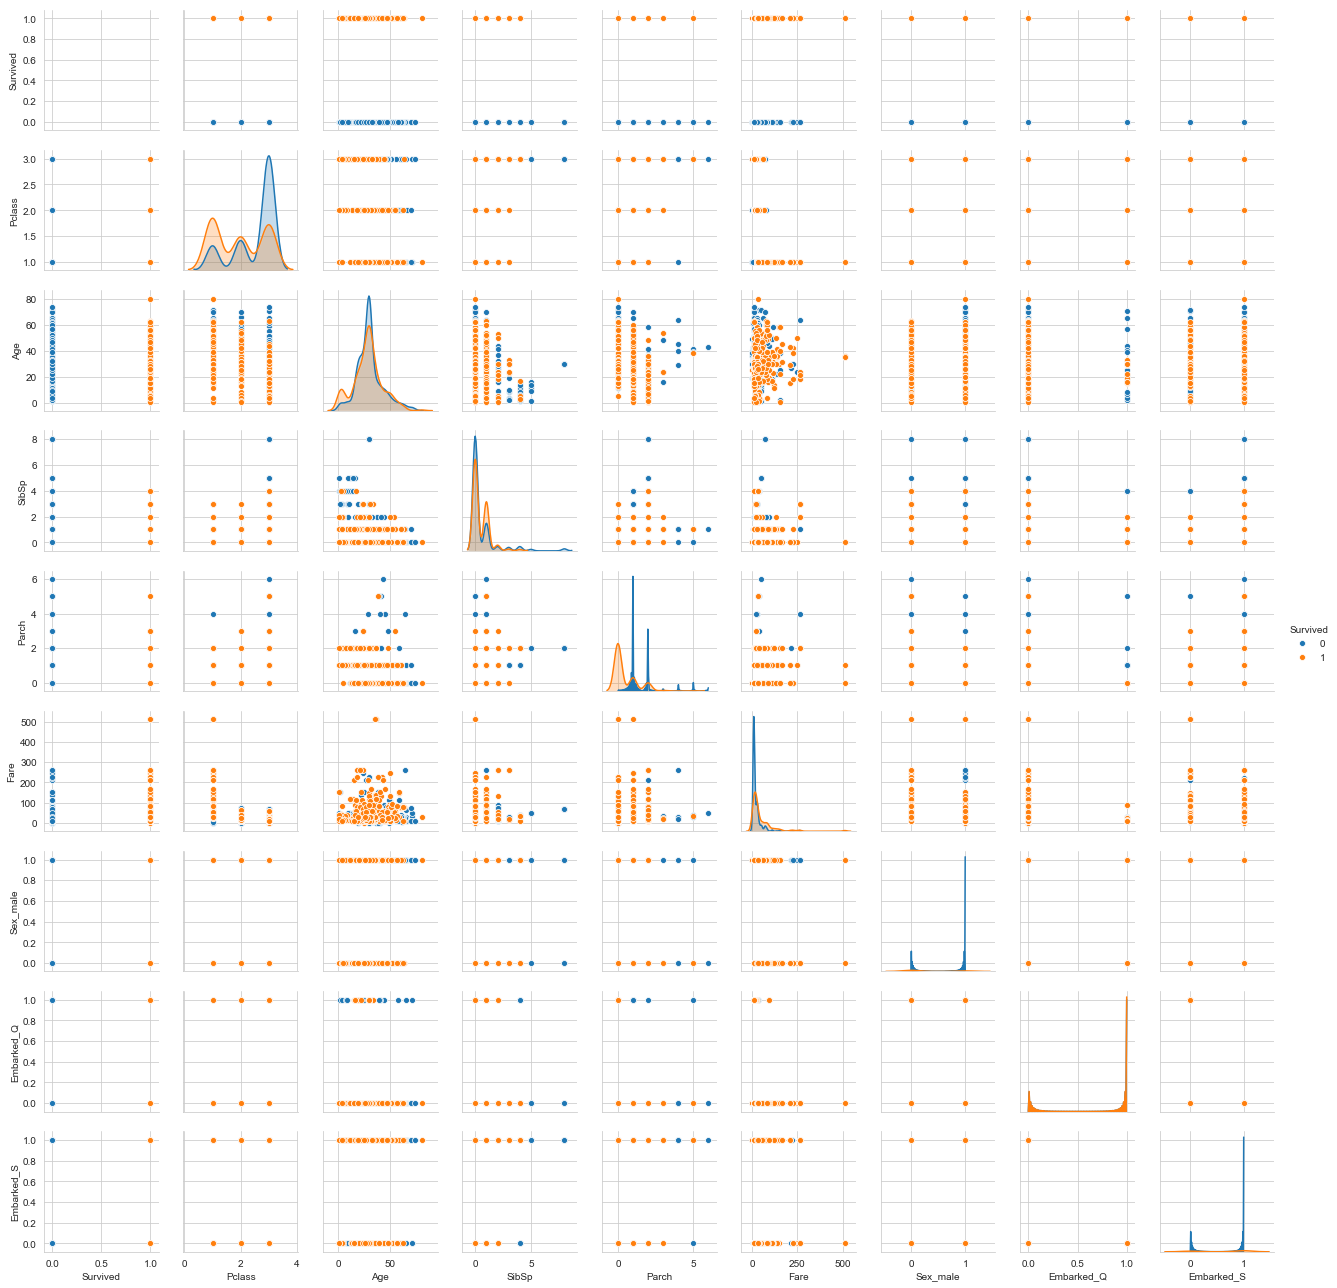

In [18]:
sns.set_style('whitegrid')
sns.pairplot(train_f,hue='Survived',height=2)
plt.show()

In [19]:
train_f['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
train_f.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
train_f.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


In [22]:
x=train_f.iloc[:,1:].values
y=train_f.iloc[:,0].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
confusion_matrix(y_test,y_pred)

array([[92, 18],
       [18, 51]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred)

0.7988826815642458